# <center> Cas de tests, rendu 2 </center>

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Import Model Linear and MLP 

In [2]:
import sys  
sys.path.insert(0, '../../python')

from linearModel import linearModel
from mlp import MLPModel

## Create Model 

In [3]:
lm = linearModel()
mlp = MLPModel()

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

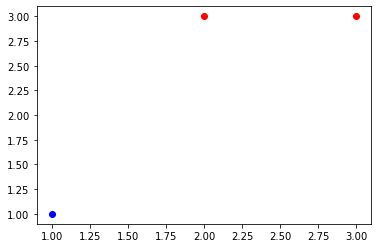

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear 

In [6]:
resultat = lm.create_linear_model(2)
model = resultat[0]
test_dataset = [[float(x1), float(x2)] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['green' if label == 1 else 'orange' for label in predicted_outputs]


lm.destroy_linear_model(resultat)

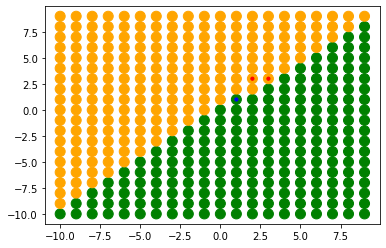

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors,s=100)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=10)
plt.show()
plt.clf()

### MLP 

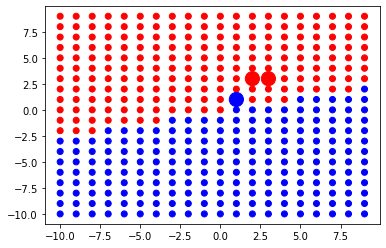

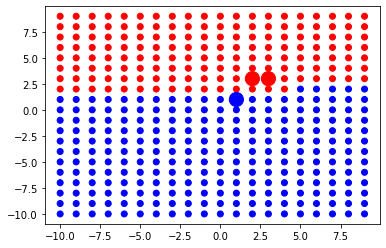

In [8]:
resultat3 = mlp.create_mlp_model([2,1])
model3 = resultat3[0]


test_dataset = [[x1 , x2 ] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.001,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [9]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

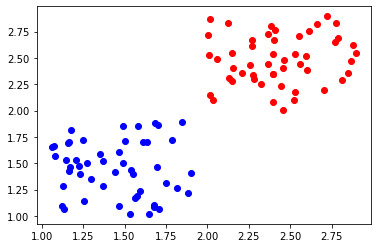

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### Linear 

In [11]:
resultat = lm.create_linear_model(2)
model = resultat[0]
test_dataset = [[float(x1)/5, float(x2)/5] for x1 in range(0, 20) for x2 in range(0, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

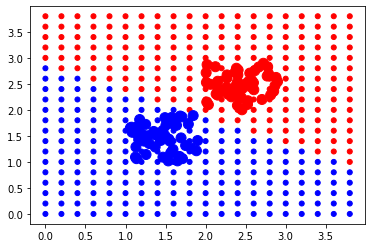

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=25)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()
plt.clf()

### MLP

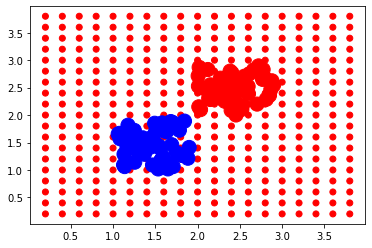

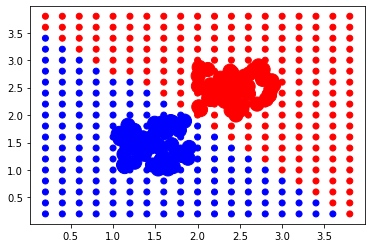

In [13]:
resultat3 = mlp.create_mlp_model([2,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/5, float(x2)/5] for x1 in range(1, 20) for x2 in range(1, 20)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.001,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [14]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

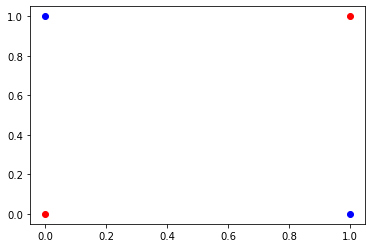

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Linear 

In [16]:
resultat = lm.create_linear_model(2)
model = resultat[0]

test_dataset = [[float(x1)/10, float(x2)/10] for x1 in range(0, 15) for x2 in range(0, 15)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

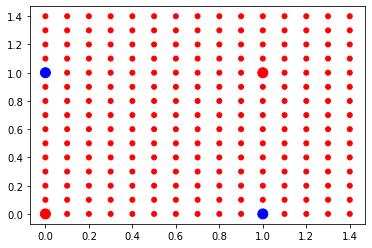

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=25)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()
plt.clf()

### MLP 

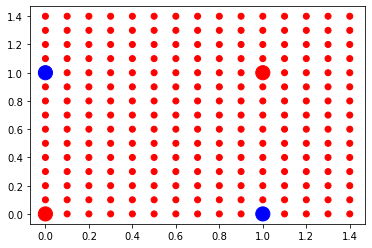

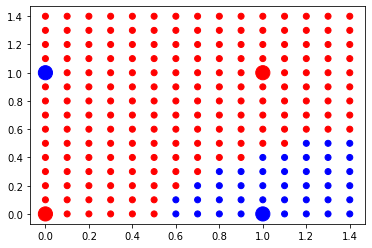

In [18]:
resultat3 = mlp.create_mlp_model([2,2,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/10, float(x2)/10] for x1 in range(0, 15) for x2 in range(0, 15)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.01,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

mlp.free_MLP(resultat3)

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [19]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

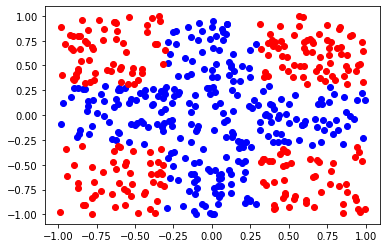

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Linear

In [21]:
resultat = lm.create_linear_model(2)
model = resultat[0]

test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]
colors = ["blue" if output >= 0 else "red" for output in Y]
predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]


flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

lm.train_classification_rosenblatt_rule_linear_model(model, flattened_dataset_inputs,
                                                        Y, 0.001,10000)

predicted_outputs = [lm.predict_linear_model_classification(model, p) for p in test_dataset]

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]

lm.destroy_linear_model(resultat)

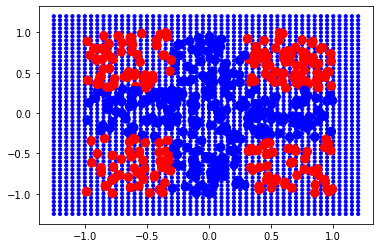

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=75)
plt.show()
plt.clf()

### MLP

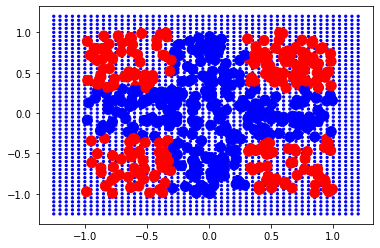

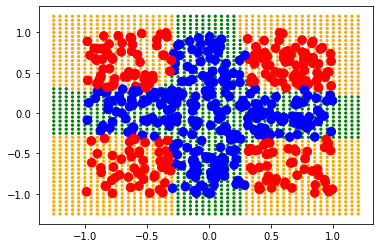

In [23]:
resultat3 = mlp.create_mlp_model([2,4,1])
model3 = resultat3[0]


test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]


predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

mlp.train_classification_stochastic_gradient_backpropagation(model3,
                                                                   flattened_dataset_inputs,
                                                                   Y,
                                                                   alpha=0.01,
                                                                   iterations_count=100000)


predicted_outputs = [mlp.predict_mlp_model_classification(model3, p) for p in test_dataset]
predicted_outputs_colors = ['green' if label >= 0 else 'orange' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=5)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=75)
plt.show()

mlp.free_MLP(resultat3)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [80]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0] for p in X])

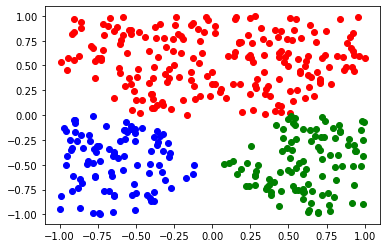

<Figure size 432x288 with 0 Axes>

In [81]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Linear 

In [82]:
resultat4 = lm.create_linear_model(2)
model4 = resultat4[0]

resultat5 = lm.create_linear_model(2)
model5 = resultat5[0]

resultat6 = lm.create_linear_model(2)
model6 = resultat6[0]

test_dataset = [[float(x1)/20, float(x2)/20] for x1 in range(-25, 25) for x2 in range(-25, 25)]

flattened_dataset_inputs_blue_to_red = []
flattened_dataset_inputs_blue_to_green = []
flattened_dataset_inputs_red_to_green = []

for p in X:  
    if(p[0] > 0):
        flattened_dataset_inputs_red_to_green.append(p[0])
        flattened_dataset_inputs_red_to_green.append(p[1])
        
    if(p[0] < 0):
        flattened_dataset_inputs_blue_to_red.append(p[0])
        flattened_dataset_inputs_blue_to_red.append(p[1])
        
    if(p[1] < 0):
        flattened_dataset_inputs_blue_to_green.append(p[0])
        flattened_dataset_inputs_blue_to_green.append(p[1])
    
    
flattened_dataset_outputs_blue_to_red = []
flattened_dataset_outputs_blue_to_green = []
flattened_dataset_outputs_red_to_green = []
for p in Y:
    if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0:
        flattened_dataset_outputs_blue_to_red.append(p[0])
        flattened_dataset_outputs_blue_to_red.append(p[1])
        flattened_dataset_outputs_blue_to_red.append(p[2])
        
        flattened_dataset_outputs_blue_to_green.append(p[0])
        flattened_dataset_outputs_blue_to_green.append(p[1])
        flattened_dataset_outputs_blue_to_green.append(p[2])
        
    elif -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 :
        flattened_dataset_outputs_blue_to_green.append(p[0])
        flattened_dataset_outputs_blue_to_green.append(p[1])
        flattened_dataset_outputs_blue_to_green.append(p[2])
        
        flattened_dataset_outputs_red_to_green.append(p[0])
        flattened_dataset_outputs_red_to_green.append(p[1])
        flattened_dataset_outputs_red_to_green.append(p[2])
        
    elif -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 : 
        flattened_dataset_outputs_blue_to_red.append(p[0])
        flattened_dataset_outputs_blue_to_red.append(p[1])
        flattened_dataset_outputs_blue_to_red.append(p[2])
        
        flattened_dataset_outputs_red_to_green.append(p[0])
        flattened_dataset_outputs_red_to_green.append(p[1])
        flattened_dataset_outputs_red_to_green.append(p[2])

#### Red to green 

In [83]:
lm.train_classification_rosenblatt_rule_linear_model(model4, flattened_dataset_inputs_red_to_green,
                                                      flattened_dataset_outputs_red_to_green, 0.01,100000)



predicted_outputsRedToGreen = [lm.predict_linear_model_classification(model4, p) for p in test_dataset]
lm.destroy_linear_model(resultat4)

####  Blue to green

In [84]:
lm.train_classification_rosenblatt_rule_linear_model(model5, flattened_dataset_inputs_blue_to_green,
                                                      flattened_dataset_outputs_blue_to_green, 0.01,100000)



predicted_outputsBlueToGreen = [lm.predict_linear_model_classification(model5, p) for p in test_dataset]
lm.destroy_linear_model(resultat5)

#### Blue to red 

In [85]:
lm.train_classification_rosenblatt_rule_linear_model(model6, flattened_dataset_inputs_blue_to_red,
                                                      flattened_dataset_outputs_blue_to_red, 0.01,100000)


predicted_outputsBlueToRed = [lm.predict_linear_model_classification(model6, p) for p in test_dataset]

lm.destroy_linear_model(resultat6)

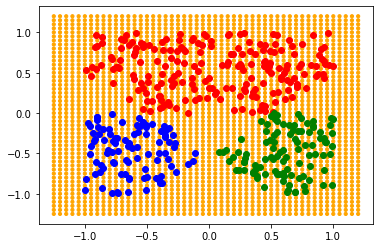

<Figure size 432x288 with 0 Axes>

In [87]:
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputsBlueToRed]


plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP

In [ ]:
resultat7 = mlp.create_mlp_model([2, 3])
model7 = resultat7[0]

test_dataset = [[float(x1) / 20, float(x2) / 20] for x1 in range(-25, 25) for x2 in range(-25, 25)]

predicted_outputs = [mlp.predict_mlp_model_classification(model7, p) for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in Y:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])

mlp.train_classification_stochastic_gradient_backpropagation(model7,
                                                             flattened_dataset_inputs,
                                                             flattened_dataset_outputs,
                                                             alpha=0.01,
                                                             iterations_count=1000000)


predicted_outputs = [mlp.predict_mlp_model_classification(model7, p) for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                            output in predicted_outputs]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors, s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()


mlp.free_MLP(resultat7)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP 

## <center> Régression </center>

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [-4],
      [2]
])
Y = np.array([
      2,
      3
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear

### MLP 

In [ ]:
resultat5 = mlp.create_mlp_model([1,1])
model5 = resultat5[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model5, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model5,
                                                               flattened_dataset_inputs,
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model5, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat5)

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear 

In [ ]:
resultat10 = lm.create_linear_model(2)
model10 = resultat10[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model10, [p]) for p in test_dataset_inputs]


plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.train_regression_pseudo_inverse_linear_model(model10, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [lm.predict_linear_model_regression(model10, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

lm.destroy_linear_model(resultat10)

### MLP 

In [ ]:
resultat11 = mlp.create_mlp_model([1,3,1])
model11 = resultat11[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.train_regression_stochastic_gradient_backpropagation(model11,
                                                               flattened_dataset_inputs,
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [mlp.predict_mlp_model_regression(model11, [p]) for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

mlp.free_MLP(resultat11)

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear 

In [ ]:
resultat12 = lm.create_linear_model(2)
model12 = resultat12[0]

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(1, 3)]
predicted_outputs = [lm.predict_linear_model_regression(model12, [p]) for p in test_dataset_inputs]


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot(test_dataset_inputs, predicted_outputs)
plt.show()
plt.clf()

lm.train_regression_pseudo_inverse_linear_model(model12, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(1, 3)]
predicted_outputs = [lm.predict_linear_model_regression(model12, [p]) for p in test_dataset_inputs]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
ax.plot(test_dataset_inputs, predicted_outputs, )
plt.show()
plt.clf()

lm.destroy_linear_model(resultat12)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()